In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
str_text = open('Border_Crossings_1960_2018.txt', 'r').read()
str_columns = str_text.split('\n')[0]
list_columns = str_columns.split(',')
list_columns = [x.strip() for x in list_columns]
list_columns

['Fiscal Year',
 'Big Bend (formerly Marfa)',
 'Del Rio',
 'El Centro',
 'El Paso',
 'Laredo',
 'Rio Grande Valley (formerly McAllen)',
 'San Diego',
 'Tucson',
 'Yuma',
 'Southwest Border Total']

In [12]:


body = str_text.split('\n')[1:-1]


df_Out = pd.DataFrame(columns=list_columns)
df_Out = pd.DataFrame()

for i in range(len(body)):
    try:
        ser = pd.Series(body[i].split(' ')).str.replace(',', '')
        df = pd.DataFrame(ser).T
        df.columns = list_columns
        df_Out = pd.concat([df_Out, df], axis=0)
    except:
        pass
    # break

df_Out = df_Out.astype(int)
df_Temp = pd.DataFrame({'Fiscal Year': [2019, 2020, 2021, 2022, 2023, 2024]
, 'Southwest Border Total': [977509, 458088, 1734686, 2378944, 2475669, 1247948]})
df_Out = pd.concat([df_Out, df_Temp]).drop_duplicates()#.sort_values('Fiscal Year', ascending=True)
df_Out['Fiscal Year Decade'] = (df_Out['Fiscal Year']/10).apply(lambda x: np.floor(x))

df_Out

,Fiscal Year,Big Bend (formerly Marfa),Del Rio,El Centro,El Paso,Laredo,Rio Grande Valley (formerly McAllen),San Diego,Tucson,Yuma,Southwest Border Total,Fiscal Year Decade
0,2018,8045.0,15833.0,29230.0,31561.0,32641.0,162262.0,38591.0,52172.0,26244.0,396579,201.0
0,2017,6002.0,13476.0,18633.0,25193.0,25460.0,137562.0,26086.0,38657.0,12847.0,303916,201.0
0,2016,6366.0,23078.0,19448.0,25634.0,36562.0,186830.0,31891.0,64891.0,14170.0,408870,201.0
0,2015,5031.0,19013.0,12820.0,14495.0,35888.0,147257.0,26290.0,63397.0,7142.0,331333,201.0
0,2014,4096.0,24255.0,14511.0,12339.0,44049.0,256393.0,29911.0,87915.0,5902.0,479371,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458088,202.0
2,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1734686,202.0
3,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2378944,202.0
4,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2475669,202.0


/tmp/ipykernel_3669063/1886220057.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  , x= 'Fiscal Year', y= 'Southwest Border Total').set_xticklabels(labels=df_Out['Fiscal Year'].sort_values(ascending=True), rotation=60)


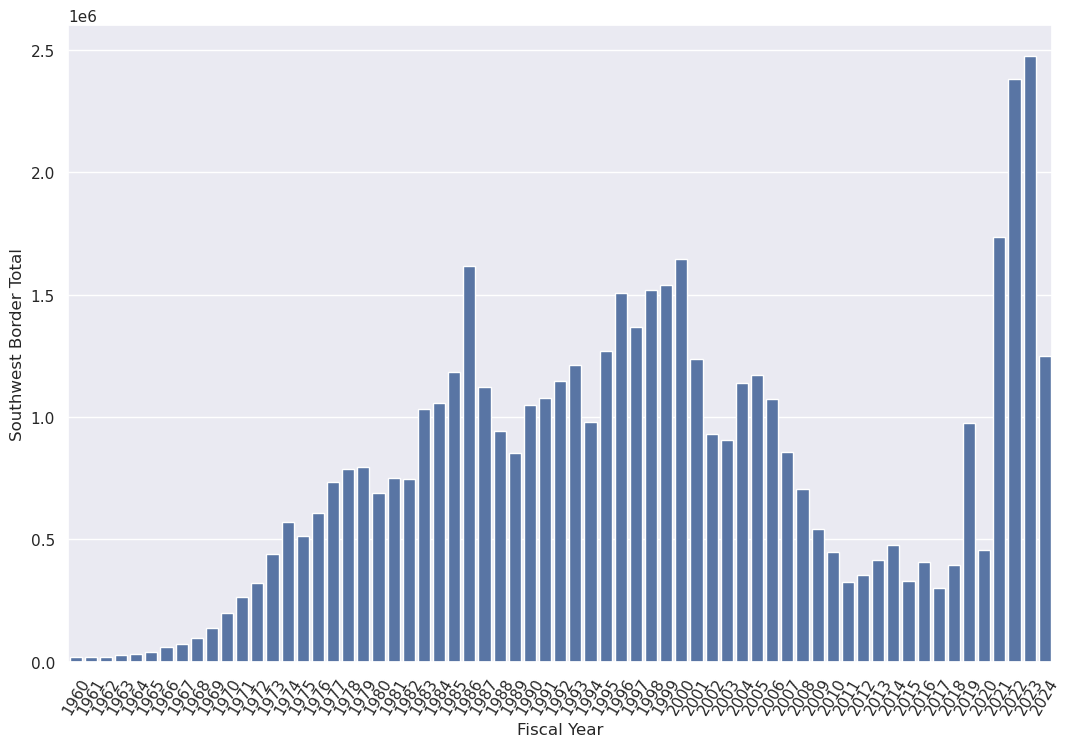

In [13]:
sns.set_theme(rc={'figure.figsize':(12.7,8.27)}), 
plt = sns.barplot(data=df_Out.sort_values('Fiscal Year', ascending=True)
                  , x= 'Fiscal Year', y= 'Southwest Border Total').set_xticklabels(labels=df_Out['Fiscal Year'].sort_values(ascending=True), rotation=60)


In [14]:
# df_Out['Southwest Border Total'].sum()
df_Out['Bins'] = pd.cut(df_Out['Southwest Border Total'], bins=[0, 500000, 1000000, 1500000, 2000000, 2500000])
df_Out[['Bins', 'Southwest Border Total']].groupby('Bins').sum()/df_Out['Southwest Border Total'].sum()

/tmp/ipykernel_3669063/3655078436.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Out[['Bins', 'Southwest Border Total']].groupby('Bins').sum()/df_Out['Southwest Border Total'].sum()


,Southwest Border Total
Bins,
"(0, 500000]",0.110754
"(500000, 1000000]",0.270300
"(1000000, 1500000]",0.338477
"(1500000, 2000000]",0.185978
"(2000000, 2500000]",0.094491


51376475


<Axes: xlabel='Fiscal Year Decade'>

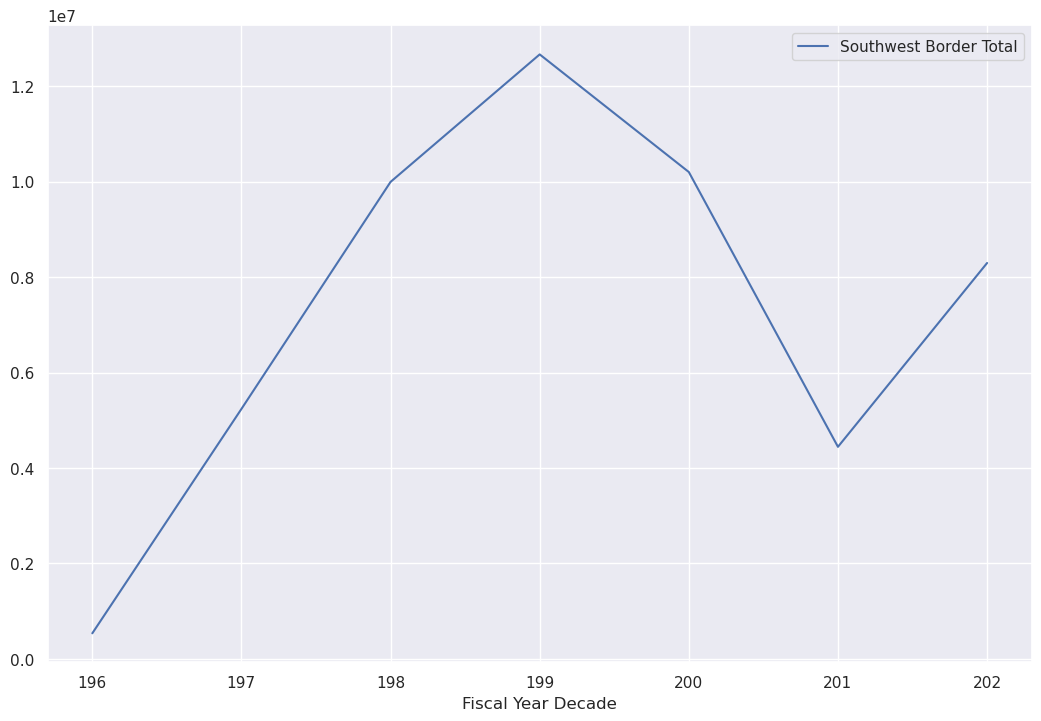

In [15]:
print(df_Out['Southwest Border Total'].sum())

df_Out[['Fiscal Year Decade', 'Southwest Border Total']].groupby('Fiscal Year Decade').sum().plot()

In [16]:
df_Out.to_csv('Yearly_Border_Apprehensions_1960_2024.csv')